In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')
ds = df['Original dataset']

##Calculate the mean and standard deviation of the dataset

In [3]:
mean_ds = round(sum(ds)/len(ds), 2)
variance_ds = round(sum(pow((x-mean_ds), 2)/(len(ds)-1) for x in ds), 2)
std_ds = round(pow(variance_ds, 1/2), 2)

In [14]:
print('mean = ', mean_ds)
print('variance = ', variance_ds)
print('standard deviation = ', std_ds)

mean =  743.03
variance =  5469.07
standard deviation =  73.95


In [5]:
subtract = [round((x-mean_ds), 2) for x in ds]

In [6]:
subtract_mean = round(sum(subtract)/(len(subtract)-1), 2)
subtract_variance = round(sum(pow((x-subtract_mean), 2)/(len(subtract)-1) for x in subtract), 2)
std_subtract = round(pow(subtract_variance, 1/2), 2)

In [7]:
print('mean = ', subtract_mean)
print('variance = ', subtract_variance)
print('standard deviation = ', std_subtract)

mean =  -0.0
variance =  5469.07
standard deviation =  73.95


##Standardize the dataset

In [8]:
standadized = [round((x/std_subtract),2) for x in subtract]

In [9]:
standadized_mean = round((sum(standadized)/(len(standadized)-1)/2), 2)
standadized_variance = round(sum(pow((x-standadized_mean),2)/(len(standadized)-1) for x in standadized), 2)
standadized_std = pow(standadized_variance, 1/2)

In [10]:
print('mean = ', standadized_mean)
print('variance = ', standadized_variance)
print('standard deviation = ', standadized_std)

mean =  0.0
variance =  1.0
standard deviation =  1.0


In [11]:
dataset = {
    'Original dataset': ds,
    'Subtracted mean': subtract,
    'Standardized': standadized
}
std_norm_dist_table = pd.DataFrame(dataset)
std_norm_dist_table

,Original dataset,Subtracted mean,Standardized
0,567.45,-175.58,-2.37
1,572.45,-170.58,-2.31
2,572.45,-170.58,-2.31
3,589.12,-153.91,-2.08
4,613.87,-129.16,-1.75
...,...,...,...
75,842.87,99.84,1.35
76,849.62,106.59,1.44
77,874.70,131.67,1.78
78,878.78,135.75,1.84


##Plot the data on a graph to see the change

In [12]:
org = std_norm_dist_table['Original dataset']
sub = std_norm_dist_table['Subtracted mean']
std = std_norm_dist_table['Standardized']

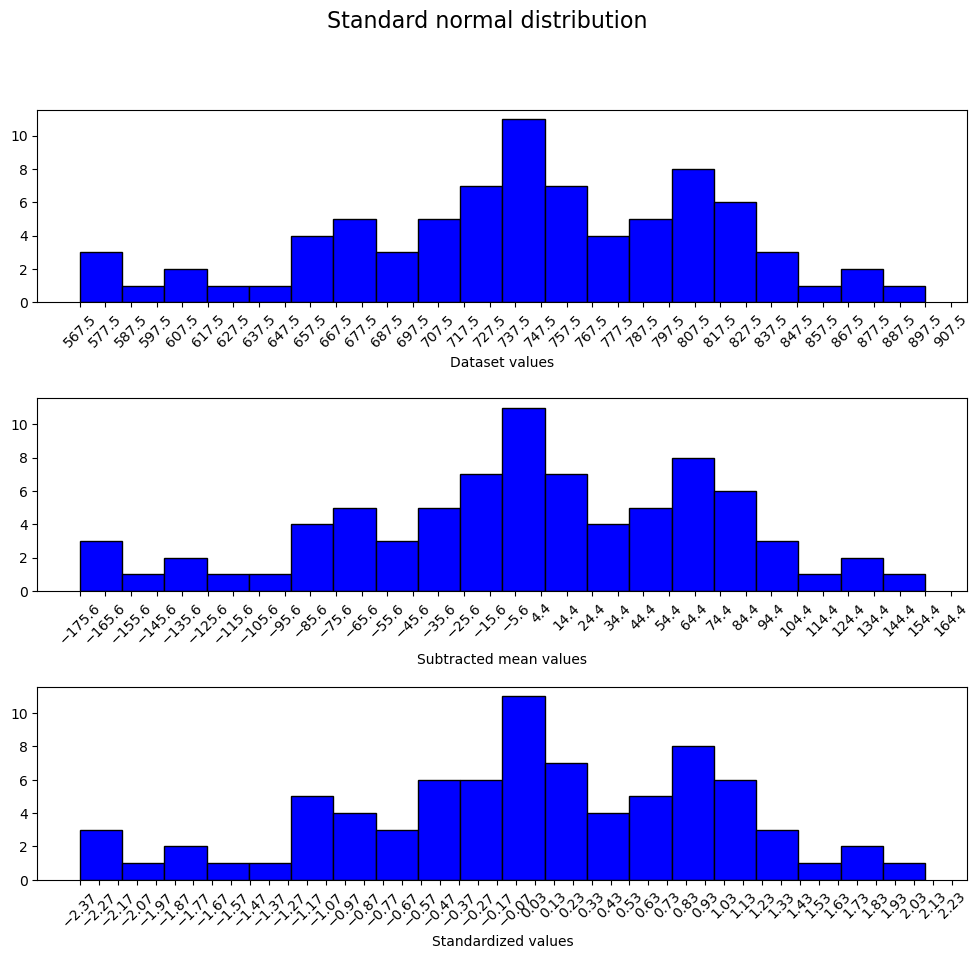

In [13]:
fig, ax = plt.subplots(3, 1, figsize = (12, 10))
bins = int(len(org)/4)

ticks1 = [org.min() + i * 10 for i in range(len(org))] 
ticks2 = [sub.min() + i * 10 for i in range(len(org))] 
ticks3 = [std.min() + i * 0.1 for i in range(len(org))] 

fig.suptitle('Standard normal distribution', fontsize=16)

ax[0].set_xticks(ticks1)
ax[0].tick_params(axis='x', rotation=45)
ax[0].hist(
    org, 
    bins = bins, 
    color = 'blue',
    edgecolor = 'black'
)
ax[0].set_xlabel('Dataset values')

ax[1].set_xticks(ticks2)
ax[1].tick_params(axis='x', rotation=45)
ax[1].hist(
    sub, 
    bins = bins, 
    color = 'blue',
    edgecolor = 'black'
)
ax[1].set_xlabel('Subtracted mean values')

ax[2].set_xticks(ticks3)
ax[2].tick_params(axis='x', rotation=45) 
ax[2].hist(
    std, 
    bins = bins, 
    color = 'blue',
    edgecolor = 'black'
)
ax[2].set_xlabel('Standardized values')

plt.subplots_adjust(hspace=0.5)

plt.show()